<a href="https://colab.research.google.com/github/arinaaandreeva/ML_lab_1/blob/main/ML_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

## **Base EDA and data preprocessing: (+3)**



**a. clarify the meaning of features you are going to exploit**

* Grade -таргет, бинарная зависимая переменная.(0 = "LGG"; 1 = "GBM")
* Были удалены ненужные признаки ID, primary_diagnosis
* Возраст был преобразован в числовой формат
* были обнаружены пропуски в  виде "--", "not reported". Для числовых признаков они были заполнены модой.
* Race, IDH1, TP53, ATRX, PTEN, EGFR, CIC, MUC16, PIK3CA,
NF1, PIK3R1, FUBP1, RB1, NOTCH1, BCOR, CSMD3, SMARCA4,
GRIN2A, IDH2, FAT4, PDGFRA категориальные признаки, которые были закодированы
*

### Предобработка данных

In [45]:
train = pd.read_csv('https://raw.githubusercontent.com/arinaaandreeva/ML_lab_1/refs/heads/main/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/arinaaandreeva/ML_lab_1/refs/heads/main/data/test.csv')


#ID не нужен, не несет смысловой нагрузки для регрессии
train.drop(['Case_ID', 'Unnamed: 0', 'Primary_Diagnosis'], axis=1, inplace=True)
test.drop(['Case_ID', 'Unnamed: 0', 'Primary_Diagnosis'], axis=1, inplace=True)

# Возраст был записан текстом с месяцами, переведем в целое число лет
train['Age_at_diagnosis'] = train.Age_at_diagnosis.str.split(' ').apply(lambda x: x[0] if x else None)
test['Age_at_diagnosis'] = test.Age_at_diagnosis.str.split(' ').apply(lambda x: x[0] if x else None)

#В данных вместо пропусков --, поэтому заменяем на nan
print(train.Gender.unique())

# В тренировочной и тестовой выборках есть несколько пропусков.Заполняем их часто самым встречающимся значением из тестовой выборки
train = train.replace('--', np.nan).replace('not reported', np.nan)
test = test.replace('--', np.nan).replace('not reported', np.nan)


train.fillna(train.mode().iloc[0], inplace=True)
test.fillna(train.mode().iloc[0], inplace=True)

['Male' 'Female' '--']


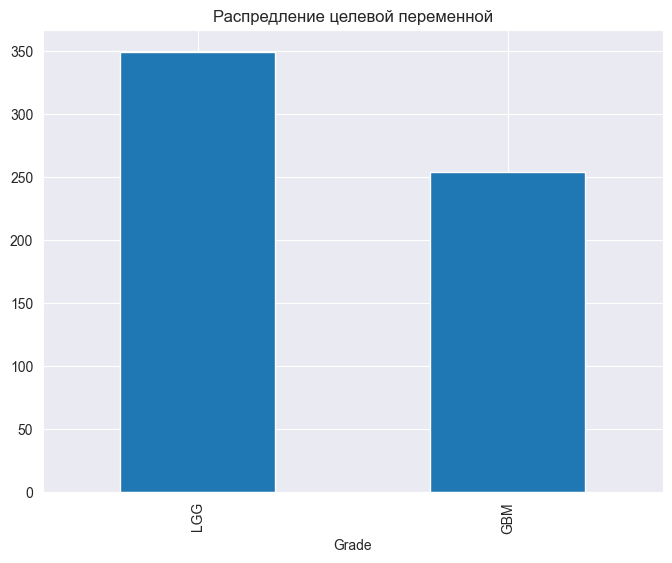

In [46]:
#Отсутствует дисбаланс классов
plt.figure(figsize=(8, 6))
train['Grade'].value_counts().plot(kind='bar')
plt.title('Распредление целевой переменной')
plt.xlabel('Grade')
plt.show()

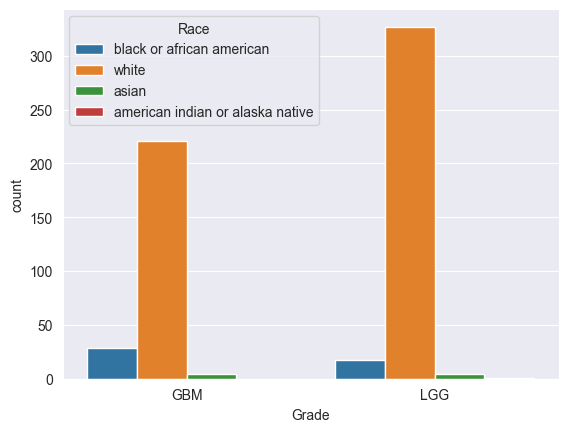

In [47]:
#нет ни одного american indian or alaska native, который бы GBM
sns.countplot(data=train, x='Grade', hue='Race');

**b. Execute the correlation analysis of variables, try to establish dependent one**

**d. Perform data preprocessing (encode your features in some way, different types of encoding may dramatically affect your model, be selective, try multiple (at leas 2) ways)**

Пробуем два энкодера:

* One-hot создает бинарные переменные
* Label использует также порядковые значения

Данные методы отличаются только для столбца Race. Содержательно мы не можем ранжировать расы, поэтому будем использовать onehot-encoder. Также по матрице корреляции ниже видно, что признаки закодированные через onehot encoder более коррелируют с таргетом.


#### One-hot encoding


In [48]:
train['Grade'] = np.where(train['Grade'] == 'GBM', 1, 0) #Кодируем таргет

encoder = OneHotEncoder(drop='first')
# Список категор переменных
categ_col = ['Gender','Race','IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1',
       'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
       'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

#Тренироввочная выборка
encoded_features = encoder.fit_transform(train[categ_col]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categ_col)
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)
train_ohe = pd.concat([train, encoded_df], axis=1).drop(categ_col, axis=1)

#тестовая выборка
encoded_df_test = encoder.transform(test[categ_col]).toarray()
encoded_df_test = pd.DataFrame(encoded_df_test, columns=encoded_feature_names)
test_ohe = pd.concat([test, encoded_df_test], axis=1).drop(categ_col, axis=1)
train_ohe

,Grade,Age_at_diagnosis,Gender_Male,Race_asian,Race_black or african american,Race_white,IDH1_NOT_MUTATED,TP53_NOT_MUTATED,ATRX_NOT_MUTATED,PTEN_NOT_MUTATED,...,FUBP1_NOT_MUTATED,RB1_NOT_MUTATED,NOTCH1_NOT_MUTATED,BCOR_NOT_MUTATED,CSMD3_NOT_MUTATED,SMARCA4_NOT_MUTATED,GRIN2A_NOT_MUTATED,IDH2_NOT_MUTATED,FAT4_NOT_MUTATED,PDGFRA_NOT_MUTATED
0,1,79,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0,53,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
2,0,61,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0,58,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0,30,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,1,67,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
599,0,27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
600,0,29,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
601,0,51,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [49]:
# scaler = MinMaxScaler()

# Xtrain_scaled = scaler.fit_transform(train_ohe.drop('Grade', axis=1))
# train_ohe = pd.DataFrame(Xtrain_scaled, columns=train_ohe.drop('Grade', axis=1).columns)
# train_ohe['Grade'] = train['Grade']

# Xtest_scaled = scaler.transform(test_ohe)
# test_ohe = pd.DataFrame(Xtest_scaled, columns=test_ohe.columns)

#### Label encoding

In [50]:
categ_col = ['Gender','Race','IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1',
       'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
       'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']


label_encoders = {}
label_train = pd.DataFrame(train['Grade'])
label_test = pd.DataFrame()

for col in categ_col:
    le = LabelEncoder()
    label_train[col] = le.fit_transform(train[col])
    label_encoders[col] = le



for col in categ_col:
    label_test[col] = label_encoders[col].transform(test[col])

In [51]:
# scaler = MinMaxScaler()

# Xtrain_scaled = scaler.fit_transform(label_train.drop('Grade', axis=1))
# label_train = pd.DataFrame(Xtrain_scaled, columns=label_train.drop('Grade', axis=1).columns)
# label_train['Grade'] = train['Grade']

# Xtest_scaled = scaler.transform(label_test)
# label_test = pd.DataFrame(Xtest_scaled, columns=label_test.columns)

#### Correlation


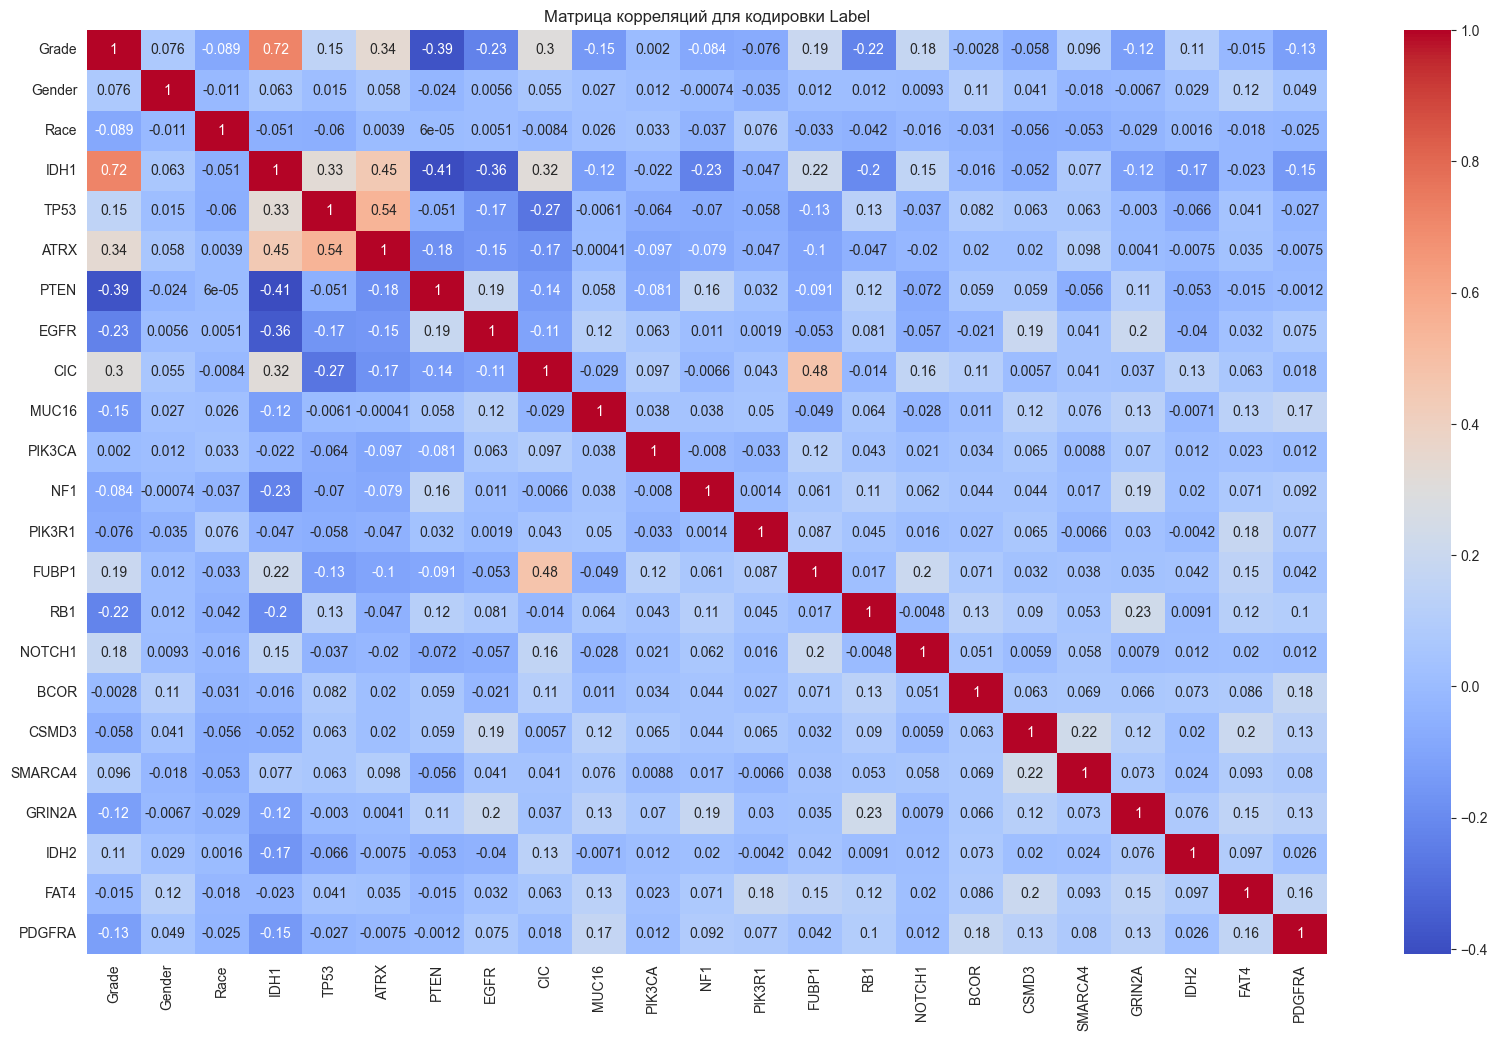

In [52]:
corr_matrix1 = label_train.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций для кодировки Label')
plt.show()

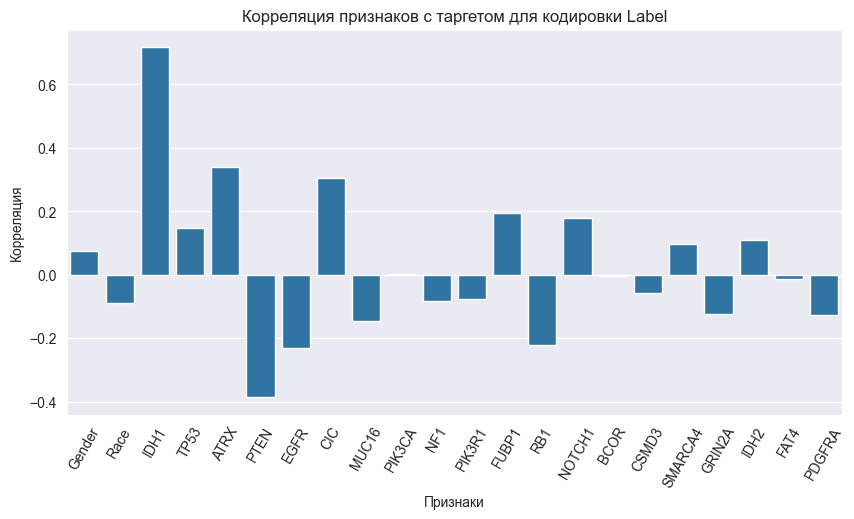

In [53]:
correlation_label =  label_train.corr()['Grade'].drop('Grade')
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_label.index, y=correlation_label.values)
plt.title('Корреляция признаков с таргетом для кодировки Label')
plt.xlabel('Признаки')
plt.ylabel('Корреляция')
plt.xticks(rotation = 60)
plt.show()

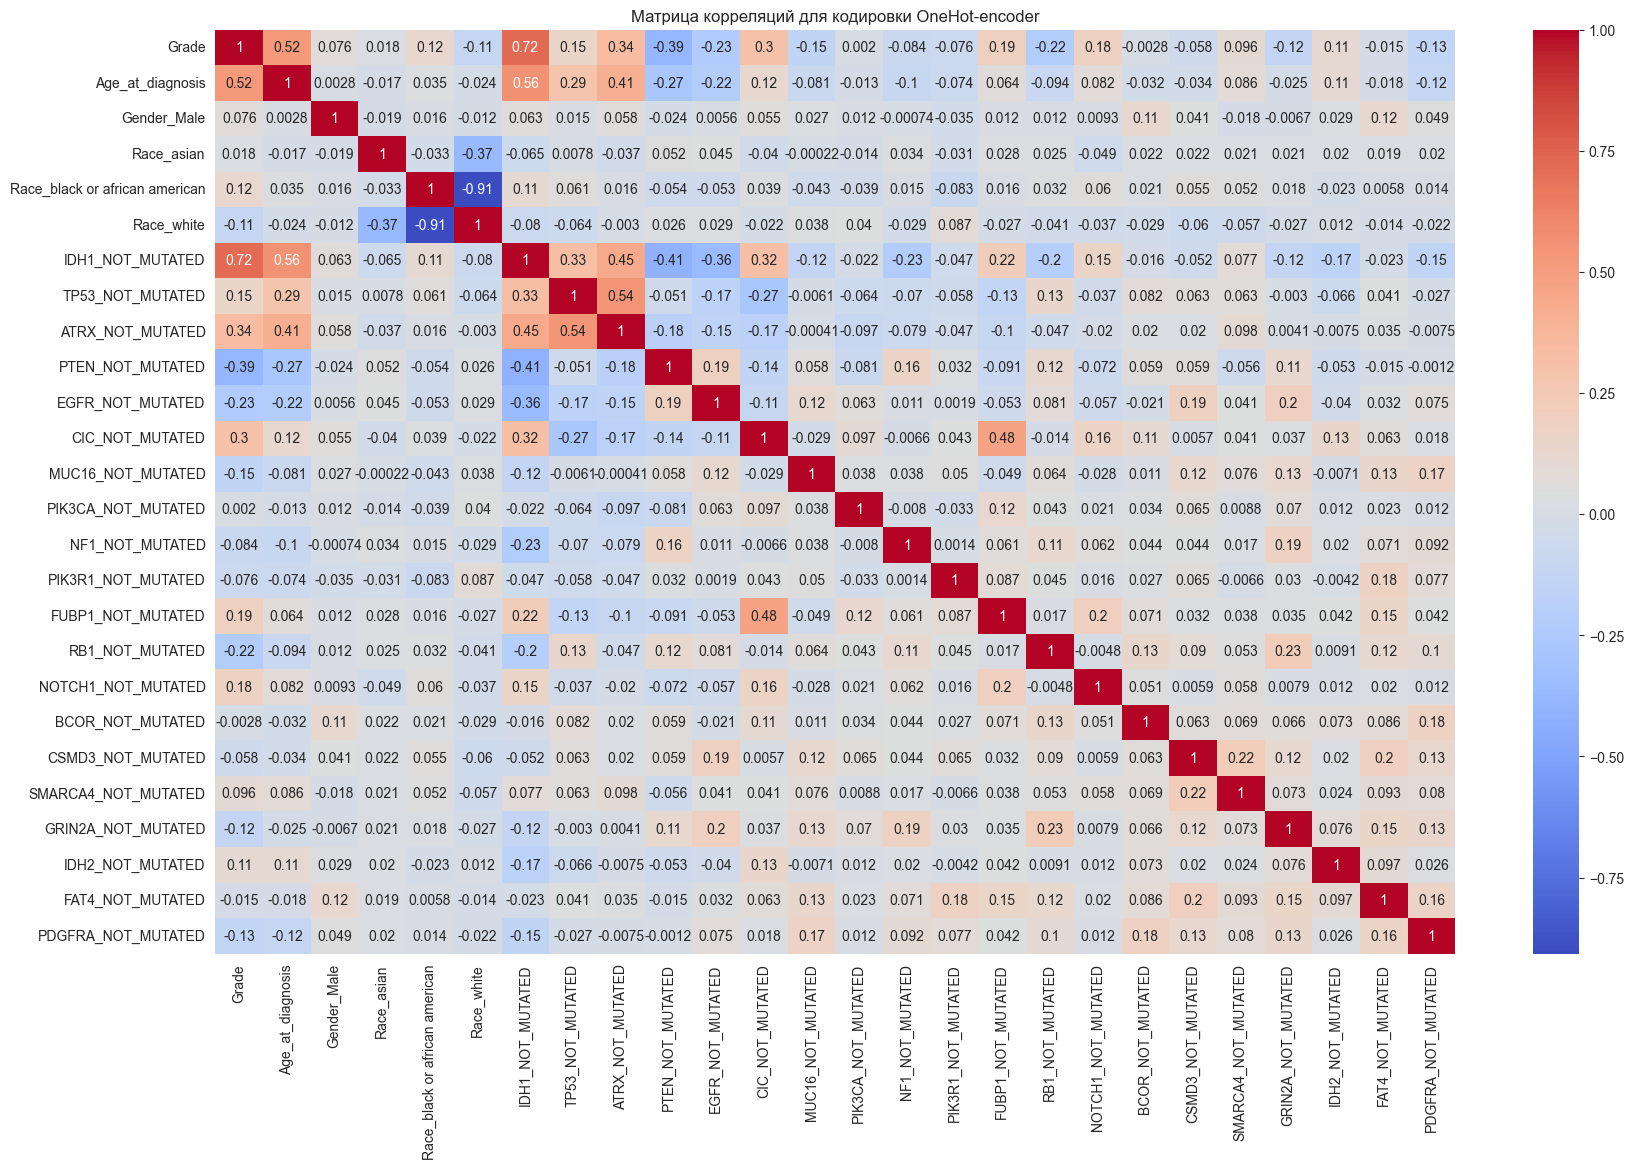

In [54]:
corr_matrix_ohe = train_ohe.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix_ohe, annot=True, cmap='coolwarm')
plt.title('Матрица корреляций для кодировки OneHot-encoder')
plt.show()

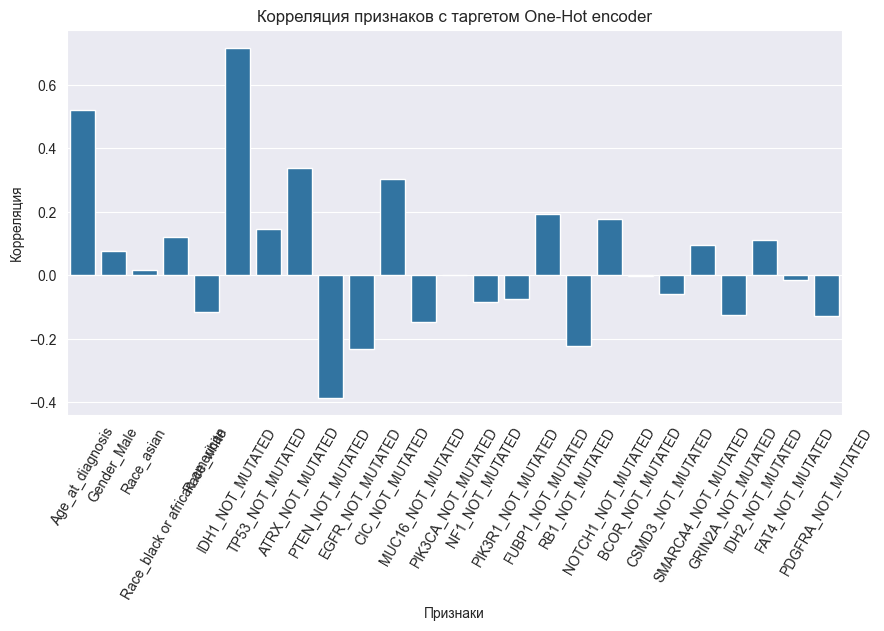

In [55]:
correlation_ohe =  train_ohe.corr()['Grade'].drop('Grade')
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_ohe.index, y=correlation_ohe.values)
plt.title('Корреляция признаков с таргетом One-Hot encoder')
plt.xlabel('Признаки')
plt.ylabel('Корреляция')
plt.xticks(rotation = 60)
plt.show()
#np.median(correlation1[abs(correlation1.values)>0.2])

**c. Perform feature selection**

Выбираем признаки с высокой корреляцией с зависимой переменной |corr|>0.2

In [56]:
selected_features = correlation_ohe[abs(correlation_ohe.values)>np.quantile(correlation_ohe, 0.8)].index
correlation_ohe[selected_features]

#np.quantile(correlation_ohe, 0.8)

Age_at_diagnosis     0.522616
IDH1_NOT_MUTATED     0.717475
ATRX_NOT_MUTATED     0.338552
PTEN_NOT_MUTATED    -0.385557
EGFR_NOT_MUTATED    -0.230718
CIC_NOT_MUTATED      0.303952
FUBP1_NOT_MUTATED    0.193978
RB1_NOT_MUTATED     -0.221305
Name: Grade, dtype: float64

In [57]:
train_df = train_ohe[selected_features]
train_df['Grade'] = train['Grade']
test_df = test_ohe[selected_features]

C:\Users\nicki\AppData\Local\Temp\ipykernel_14008\2868729941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Grade'] = train['Grade']


 Получем выборки:

*    train_df
*   test_df

В них данные закодированы, но **не** стандартизированы


In [58]:
# x_train_df содержит данные для обучения
x_train_df = train_df.copy()
x_train_df.drop(['Grade'], axis=1, inplace=True)
x_train_df.drop(['Age_at_diagnosis'], axis=1, inplace=True)
x_train_df = pd.concat([train_df['Age_at_diagnosis'].astype(int).copy(), x_train_df], axis=1)
x_train_df

,Age_at_diagnosis,IDH1_NOT_MUTATED,ATRX_NOT_MUTATED,PTEN_NOT_MUTATED,EGFR_NOT_MUTATED,CIC_NOT_MUTATED,FUBP1_NOT_MUTATED,RB1_NOT_MUTATED
0,79,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,53,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,61,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,58,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,30,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
598,67,1.0,1.0,1.0,1.0,1.0,1.0,1.0
599,27,0.0,0.0,1.0,1.0,1.0,1.0,1.0
600,29,0.0,0.0,1.0,1.0,1.0,1.0,1.0
601,51,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [59]:
# 5 задание:Try an ensemble model with trainable and non-trainable weights.

#Градиентный бустинг с обучаемыми весами
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(x_train_df, train_df['Grade'], test_size=0.2, random_state=42)

# Создание и обучение модели для теста оценки
gb_model = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

# Оценка производительности
score = gb_model.score(X_valid, y_valid)
print(f"Accuracy: {score}")


Accuracy: 0.859504132231405


In [60]:
# Создание и обучение модели для прогнозирования
gb_model_main = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3)
gb_model_main.fit(x_train_df, train_df['Grade'])

# Прогнозируем на тестовых данных
predictions = gb_model_main.predict(test_df)

results_df = pd.DataFrame({
    'Id': range(len(predictions)),   # Если Id присутствует в тестовом DataFrame
    'Grade': predictions
})

# Сохранение результатов в файл
results_df.to_csv('predictions_gb.csv', index=False)

In [63]:
# Бэггинг с фиксированными весами (для теста точности)
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_valid, y_train, y_valid = train_test_split(x_train_df, train_df['Grade'], test_size=0.2, random_state=42)
X_train1, X_tmp, y_train1, y_tmp = train_test_split(X_train, y_train, test_size=0.66, random_state=42)
X_train2, X_train3, y_train2, y_train3 = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

# Обучение нескольких моделей - случайных лесов с разными параметрами или одно дерево
model_rf_1 = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42)
model_rf_2 = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
model_rf_3 = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42)

model_rf_1.fit(X_train1, y_train1)
model_rf_2.fit(X_train2, y_train2)
model_rf_3.fit(X_train3, y_train3)

# Получаем предсказания от моделей
preds_model1 = model_rf_1.predict(X_valid)
preds_model2 = model_rf_2.predict(X_valid)
preds_model3 = model_rf_3.predict(X_valid)

# Определяем фиксированные веса для предсказаний
weight1 = 0.5
weight2 = 0.3
weight3 = 0.2

# Комбинируем предсказания с фиксированными весами
final_preds = np.round(weight1 * preds_model1 + weight2 * preds_model2 + weight3 * preds_model3)

# Оценка производительности
accuracy = accuracy_score(y_valid, final_preds)
print(f"Accuracy: {accuracy}")


Accuracy: 0.859504132231405


In [65]:
# Бэггинг с фиксированными весами (для предсказания)
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train1, X_tmp, y_train1, y_tmp = train_test_split(x_train_df, train_df['Grade'], test_size=0.66, random_state=42)
X_train2, X_train3, y_train2, y_train3 = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

# Обучение нескольких моделей - случайных лесов с разными параметрами или одно дерево
model_rf_1 = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42)
model_rf_2 = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
model_rf_3 = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42)

model_rf_1.fit(X_train1, y_train1)
model_rf_2.fit(X_train2, y_train2)
model_rf_3.fit(X_train3, y_train3)

# Получаем предсказания от моделей
preds_model1 = model_rf_1.predict(X_valid)
preds_model2 = model_rf_2.predict(X_valid)
preds_model3 = model_rf_3.predict(X_valid)

# Определяем фиксированные веса для предсказаний
weight1 = 0.5
weight2 = 0.3
weight3 = 0.2

# Комбинируем предсказания с фиксированными весами
final_preds = np.round(weight1 * preds_model1 + weight2 * preds_model2 + weight3 * preds_model3)

# Комбинируем предсказания с фиксированными весами
final_preds_test = np.round(weight1 * preds_model1 + weight2 * preds_model2 + weight3 * preds_model3)

results_df = pd.DataFrame({
    'Id': range(len(final_preds_test)),   # Если Id присутствует в тестовом DataFrame
    'Grade': final_preds_test.astype(int)
})


# Сохранение результатов в файл
results_df.to_csv('predictions_stacking.csv', index=False)